<a href="https://colab.research.google.com/github/RuolinZheng08/cmsc25460-optimization/blob/master/HW5_grad_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smooth Gradient Descent

In this notebook you will solve least squares for the boston housing dataset using smooth gradient descent.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Find the smoothness of the function $\frac{1}{2}\|Ax - y\|_2^2$ and code smooth gradient descent.

In [0]:
def plot_2d_solution(A, xs, d):
  xs = np.array(xs)
  Apinv = np.linalg.pinv(A)
  x_star = Apinv @ d
  x, y = np.linspace(-8, 3, 151), np.linspace(-2, 8, 151)
  X, Y = np.array(np.meshgrid(x, y))
  Z = np.zeros([x.size, y.size])
  for i, a in enumerate(x):
    for j, b in enumerate(y):
        Z[j, i] = np.linalg.norm(A @ [a, b] - d)**2 / 2
  fig = plt.figure(figsize=(10, 10))
  plt.contour(x, y, Z)
  print(xs.shape)
  plt.plot(xs[:, 0], xs[:, 1], "o-")
  plt.plot(xs[-1, 0], xs[-1, 1], "r*")
  plt.axis('equal')
  plt.axis([-7, 2, -1, 7])
  plt.show()

In [0]:
def smooth_least_squares(A, y, step_mult=1, num_iters=65526):
  # TODO: Find maximum eigenvalue of A
  M = max(np.linalg.eigvals(A.T @ A))
  step_size = 1 / M * step_mult
  print('step size', step_size)
  xs = [np.zeros(A.shape[1])]
  suboptimality = []

  # cache some repeated calculations
  grad_coeff = A.T @ A
  grad_const = A @ y

  for i in range(num_iters):
    if (i % 10000 == 0):
      print("\r{}".format(i), end='')
    gradient = grad_coeff @ xs[-1] - grad_const            # TODO: Find the gradient.
    xs.append(xs[-1] - step_size * gradient)   # TODO: Write the correct update. Experiment with step sizes to see what happens 
    suboptimality.append(np.linalg.norm(A @ xs[-1] - y)**2 / 2)

  print("\r{}".format(i))
  return xs[-1], xs, i, suboptimality

step size 1.0
65525
(65527, 2)


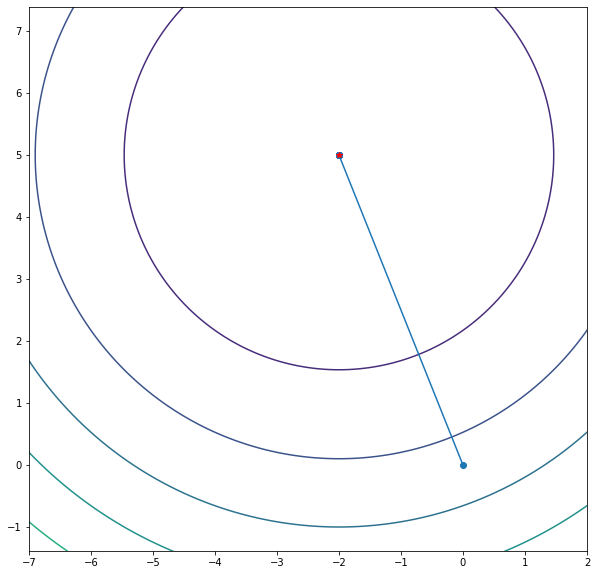

In [61]:
B = np.array([[1.0, 0.0], [0.0, 1.0]])
b = np.array([-2, 5])
x, xs, iterations, suboptimality = smooth_least_squares(B, b)
plot_2d_solution(B, xs, b)

step size 0.04
65525
(65527, 2)


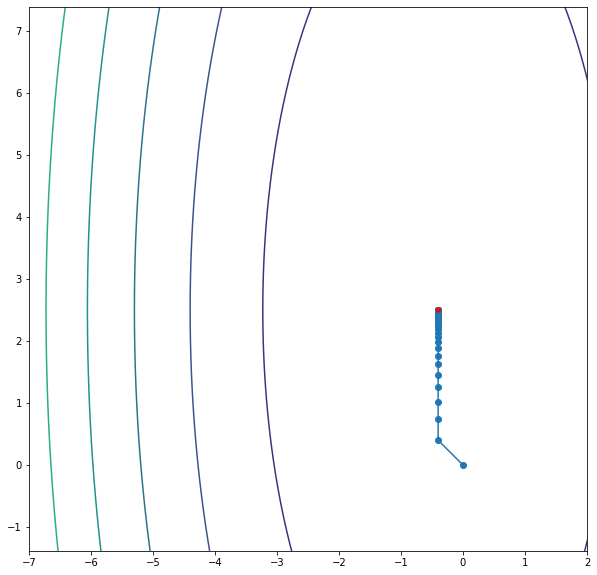

In [62]:
C = np.array([[5, 0], [0, 2]])
x, xs, iterations, suboptimality = smooth_least_squares(C, b)
plot_2d_solution(C, xs, b)

In [0]:
# Optional: Plot cost vs iterations for different step sizes.
#           What do you observe?
#           Can you think of any modification that would make the gradient descent converge faster?

def smooth_ls(A, y, step_mult, num_iters):
  M = max(np.linalg.eigvals(A.T @ A))
  step_size = 1 / M * step_mult
  grad_coeff = A.T @ A
  grad_const = A @ y
  xs = [np.zeros(A.shape[1])]
  costs = []
  for _ in range(num_iters):
    gradient = grad_coeff @ xs[-1] - grad_const
    xs.append(xs[-1] - step_size * gradient)
    costs.append(np.linalg.norm(A @ xs[-1] - y)**2 / 2)
  return costs, step_size

def plot_diff_step_sizes(A, y, step_mults):
  num_iters = 200
  plt.figure(figsize=(8, 8))
  for mult in step_mults:
    costs, step_size = smooth_ls(A, y, mult, num_iters)
    plt.plot(np.arange(num_iters), costs, label=str(np.round(step_size, 4)))
  plt.legend()
  plt.xlabel('# iter')
  plt.ylabel('cost')
  plt.show()

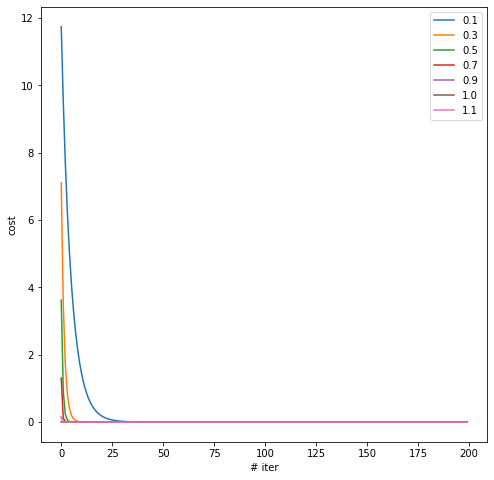

In [70]:
plot_diff_step_sizes(B, b, [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1])

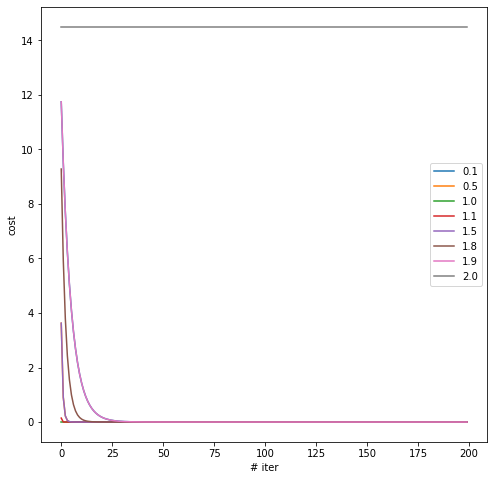

In [68]:
plot_diff_step_sizes(B, b, [0.1, 0.5, 1, 1.1, 1.5, 1.8, 1.9, 2])

With a smaller step size, cost decreases more slowly and converges more slowly. With a larger step size, however, sometimes the steps overshoot. In the plot above, when `step_size=2`, GD always miss the glocal minimum, and in the plot below, when `step_size=0.8`, GD gets stuck in a local minimum.

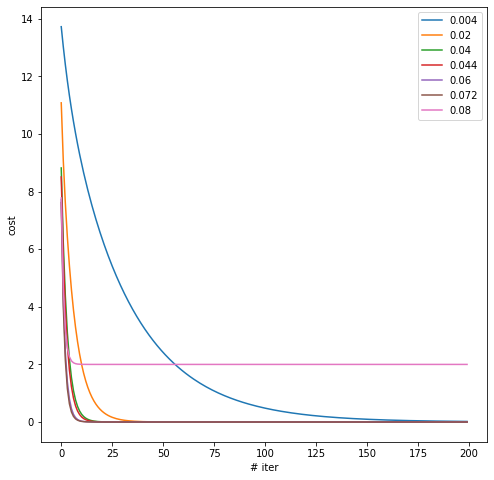

In [73]:
plot_diff_step_sizes(C, b, [0.1, 0.5, 1, 1.1, 1.5, 1.8, 2])

step size 1.8
65525
(65527, 2)


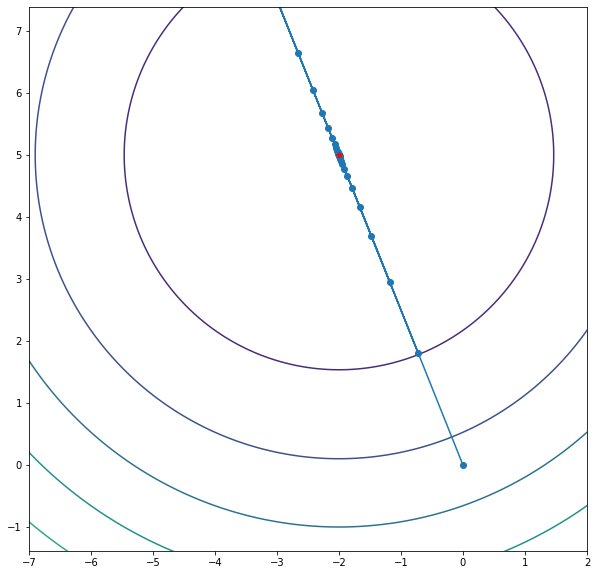

In [75]:
# case of bit step size + overshooting
x, xs, iterations, suboptimality = smooth_least_squares(B, b, step_mult=1.8)
plot_2d_solution(B, xs, b)

step size 1.9
65525
(65527, 2)


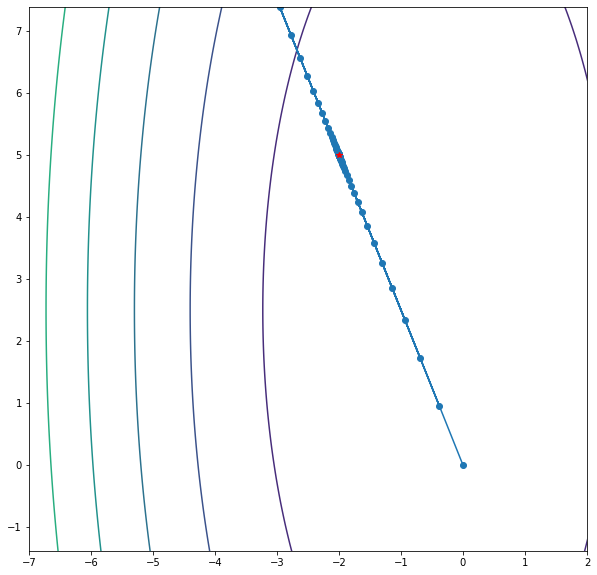

In [78]:
# case of getting stuck in local min
x, xs, iterations, suboptimality = smooth_least_squares(B, b, step_mult=1.9)
plot_2d_solution(C, xs, b)